<a href="https://colab.research.google.com/github/bruiz1974/Challenge-Telecom-/blob/main/Copy_of_telecom_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -----------------------------------------------------------
# 📌 1. IMPORTACIÓN DE LIBRERÍAS
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# Configuración visual de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# -----------------------------------------------------------
# 📥 2. CARGA DE DATOS DESDE EL JSON EN GITHUB
# -----------------------------------------------------------

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()

# Convertimos el JSON anidado en un DataFrame tabular
df = pd.json_normalize(data)

# Mostramos los nombres de columnas disponibles
print("Columnas del DataFrame:")
print(df.columns.tolist())

# Vista previa de los datos
df.head()

Columnas del DataFrame:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# -----------------------------------------------------------
# 🧼 3. LIMPIEZA BÁSICA
# -----------------------------------------------------------

# Eliminamos registros duplicados
df.drop_duplicates(inplace=True)

# valores nulos hay por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificamos y convertimos la columna 'Churn' a valores binarios si es de tipo texto
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


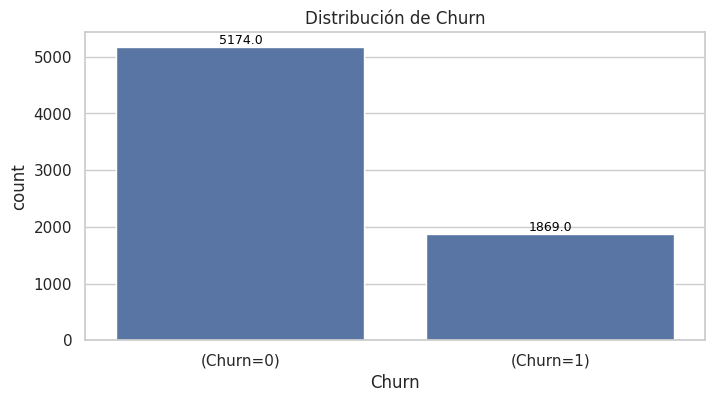

In [ ]:
# -----------------------------------------------------------
# 📊 4.1 ANÁLISIS EXPLORATORIO: DISTRIBUCIÓN DE CHURN
# -----------------------------------------------------------
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)

# Agregar los valores encima de cada barra
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # posición centrada sobre la barra
        y=height + 1,                     # ligeramente encima de la barra
        s=str(height),                   # valor como texto
        ha='center', va='bottom',        # alineación
        fontsize=9, color='black'
    )

# Cuántos clientes cancelaron vs. no cancelaron
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.xticks([0, 1], ['(Churn=0)', '(Churn=1)'])
plt.show()

<ipython-input-66-a11019a08ce3>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


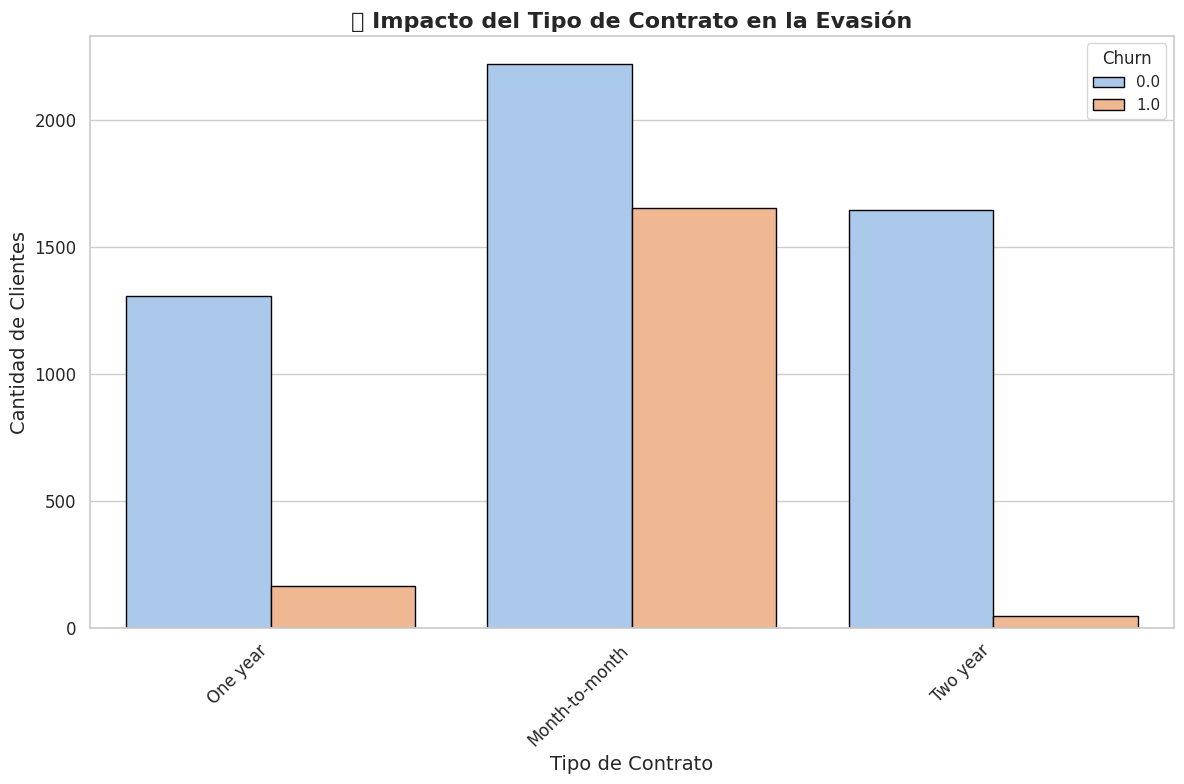

In [ ]:
#-----------------------------------------------------------
# 📊 4.2 ANÁLISIS DE VARIABLES CATEGÓRICAS VS CHURN
# -----------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del gráfico con nuevo título
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.countplot(data=df, x='account.Contract', hue='Churn', palette='pastel', edgecolor="black")

# Modificar el título del gráfico
plt.title("📊 Impacto del Tipo de Contrato en la Evasión", fontsize=16, fontweight="bold")
plt.xlabel("Tipo de Contrato", fontsize=14)
plt.ylabel("Cantidad de Clientes", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


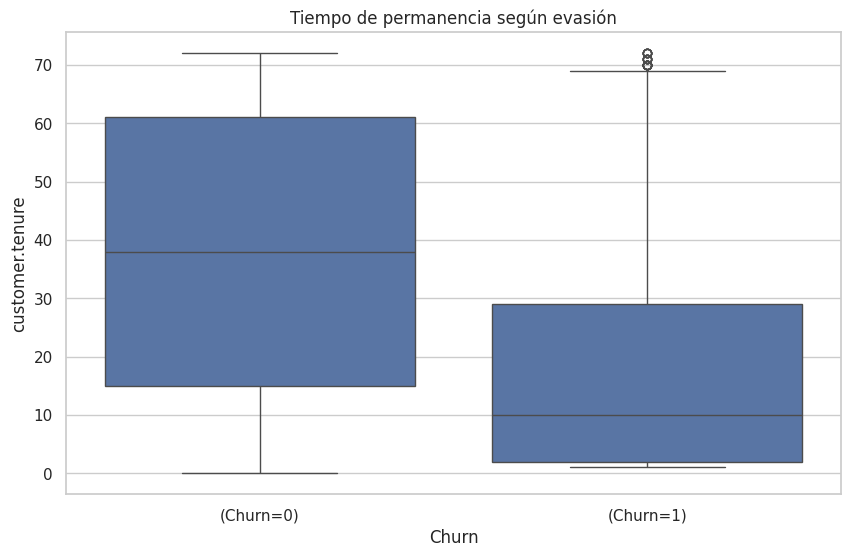

In [ ]:
# -----------------------------------------------------------
# 📊 4.3 ANÁLISIS DE VARIABLES NUMÉRICAS VS CHURN
# -----------------------------------------------------------

# Analizamos cómo varía el tiempo de permanencia entre clientes que cancelan y los que no
sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title("Tiempo de permanencia según evasión")
plt.xticks([0, 1], ['(Churn=0)', '(Churn=1)'])
plt.show()

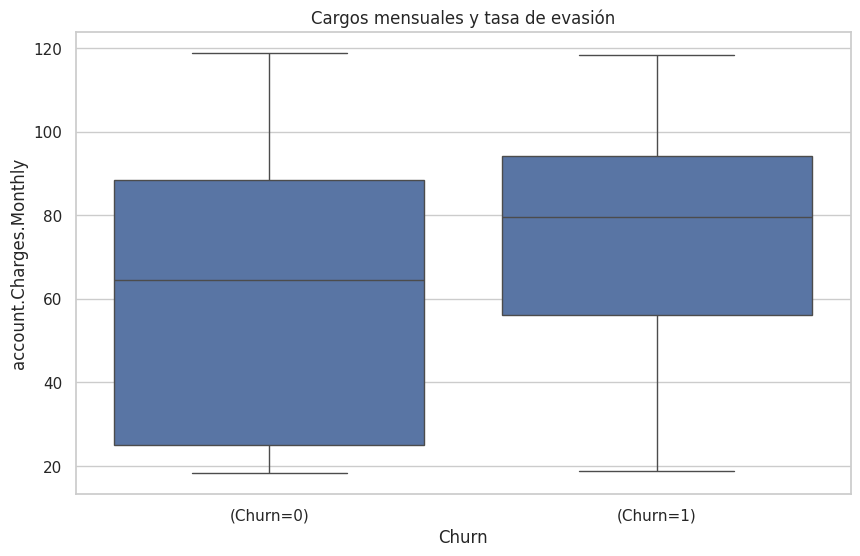

In [ ]:
# -----------------------------------------------------------
# 📊 4.4 CARGOS MENSUALES VS CHURN
# -----------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly')
plt.title("Cargos mensuales y tasa de evasión")
plt.xticks([0, 1], ['(Churn=0)', '(Churn=1)'])
plt.show()


<ipython-input-69-8df19dffcaa1>:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


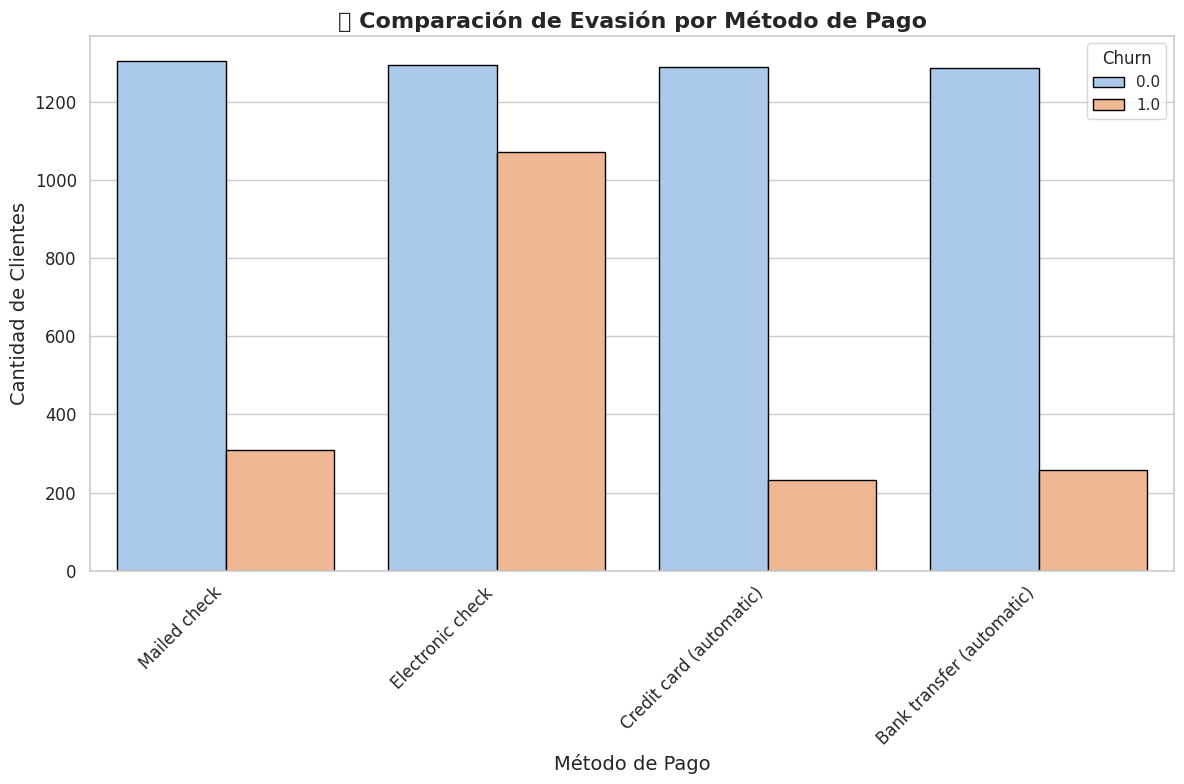

In [ ]:
# -----------------------------------------------------------
# 📊 4.5 Comparación de Evasión por Método de Pago
# -----------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del gráfico con una nueva paleta
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Fondo limpio y claro
sns.countplot(data=df, x='account.PaymentMethod', hue='Churn', palette='pastel', edgecolor="black")

# Mejoramos el título y etiquetas
plt.title("📊 Comparación de Evasión por Método de Pago", fontsize=16, fontweight="bold")
plt.xlabel("Método de Pago", fontsize=14)
plt.ylabel("Cantidad de Clientes", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de diseño
plt.tight_layout()
plt.show()




Conteo de evasión por intervalo de tenure:
Churn        0.0   1.0
tenure_bin            
0-12        1138  1037
13-24        730   294
25-48       1269   325
49-72       2026   213


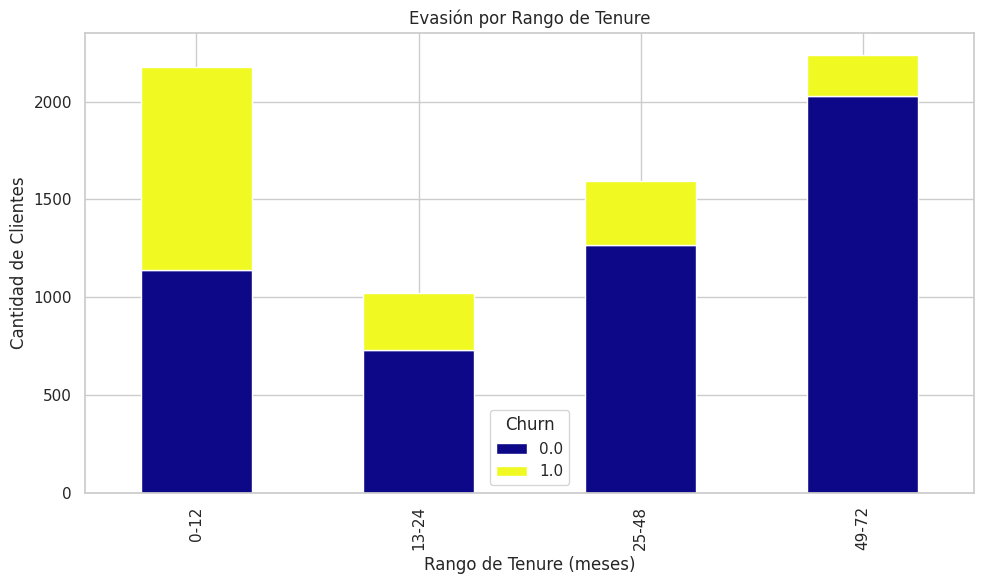

In [ ]:
# ─────────────────────────────────────────────
# 📊 4.6 Análisis por bins
# ─────────────────────────────────────────────

# Crear bins de tenure
# Cambiamos 'tenure' por 'customer.tenure' para usar el nombre correcto de la columna
df['tenure_bin'] = pd.cut(df['customer.tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])

# Conteo de evasión por rango de tenure
conteo_tenure = pd.crosstab(df['tenure_bin'], df['Churn'])
print("\nConteo de evasión por intervalo de tenure:")
print(conteo_tenure)

# (Gráfico de barras)
conteo_tenure.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Evasión por Rango de Tenure')
plt.xlabel('Rango de Tenure (meses)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


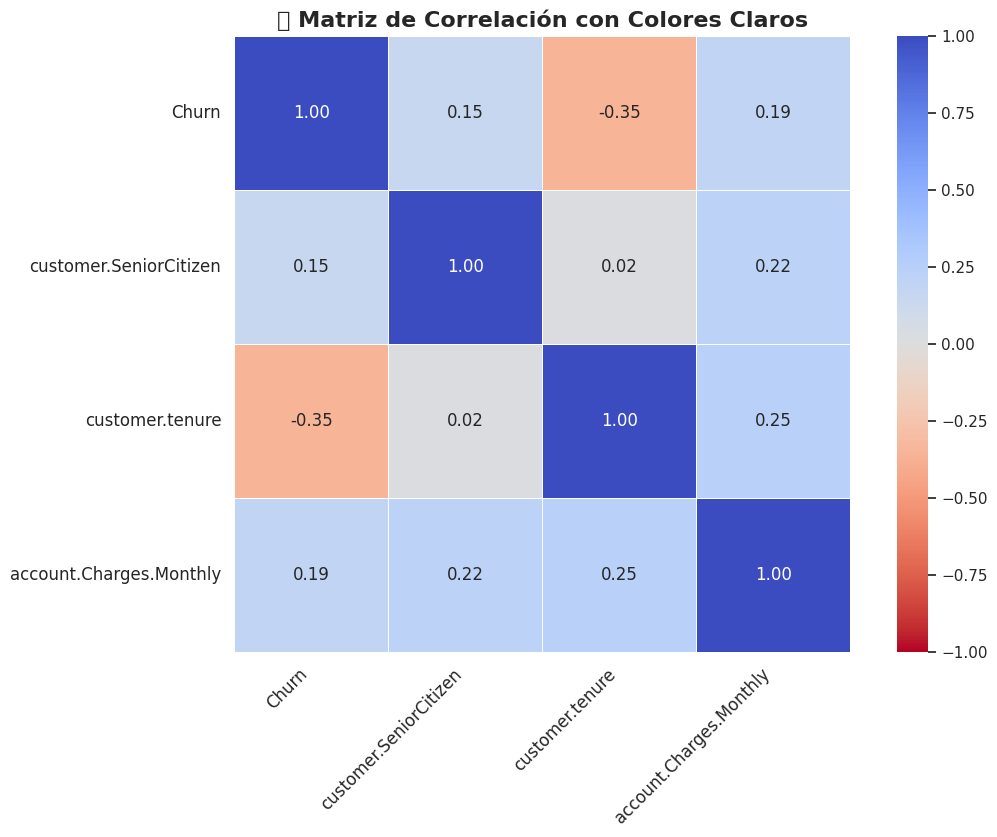

In [ ]:
# -----------------------------------------------------------
# 🔍 5. ANÁLISIS DE CORRELACIÓN (EXTRA)
# -----------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del gráfico con una nueva paleta más clara
plt.figure(figsize=(12, 8))
sns.set_style("white")  # Fondo limpio sin distracciones
sns.heatmap(correlaciones, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5, square=True, vmin=-1, vmax=1)

# Mejoramos el título y etiquetas
plt.title("🔍 Matriz de Correlación con Colores Claros", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Mostrar el gráfico
plt.show()



# -----------------------------------------------------------
## 📋 6. **CONCLUSION Y RECOMENDACION**
# -----------------------------------------------------------

### ✅ Conclusiones

Contratos Mensuales: Los clientes con planes mensuales se van más fácilmente, ya que no tienen un compromiso a largo plazo.
Clientes Nuevos: Quienes llevan poco tiempo con nosotros tienden a cancelar más, lo que indica que el inicio de su experiencia es crucial.
Precios Altos: Si los cargos mensuales son elevados, los clientes se van más. Esto sugiere que no sienten que el servicio vale lo que pagan.
Pagos Electrónicos: Curiosamente, el método de pago electrónico está relacionado con una mayor tasa de cancelación.

### 💡 Recomendaciones

Atraer a los Nuevos Clientes: Ofrezcan promociones y descuentos a los clientes que recién llegan para que se queden con nosotros desde el principio.
Fomentar Contratos Largos: Den beneficios especiales a quienes elijan planes anuales o de mayor duración.
Comunicar Mejor el Valor: Expliquen claramente a los clientes por qué nuestro servicio vale lo que cuesta, resaltando sus beneficios.
Alertas Tempranas: Implementen un sistema para detectar a tiempo a los clientes que están en riesgo de irse y así poder actuar.
Ofertas a Medida: No den descuentos genéricos. Ofrezcan soluciones personalizadas que resuelvan los problemas específicos de cada cliente. Por ejemplo, si alguien usa mucha data, denle más gigas.